In [3]:
import os
import pandas as pd
import numpy as np
from gensim import models
import nltk
import random
from nltk import word_tokenize
import matplotlib.pyplot as plt

from code.fetch_data import fetchFiles
json_files = fetchFiles()

In [4]:
def get_min_keys(doc):
    min_l = np.Inf
    selected_keys = None
    for json in doc:
        if len(json.keys()) <= min_l:
            min_l = len(json.keys())
            selected_keys = json.keys()
    return selected_keys

    
min_k = [u'contributors', u'truncated', u'text', u'is_quote_status', u'in_reply_to_status_id', u'id', u'favorite_count',
         u'source', u'retweeted', u'coordinates', u'entities', u'in_reply_to_screen_name', u'id_str', u'retweet_count',
         u'in_reply_to_user_id', u'favorited', u'user', u'geo', u'in_reply_to_user_id_str', u'lang', u'created_at',
         u'in_reply_to_status_id_str', u'place', u'metadata']

dict_k = {}
for key in min_k:
    dict_k[key] = []
    
def get_dict(dict_k):
    i = 0
    for files in json_files:
        i += 1
        for json in files:
            for key in min_k:
                dict_k[key].append(json[key])
#         print 'Files ', i    
    return dict_k
        

root_data = pd.DataFrame(get_dict(dict_k))
# print df.size
df = root_data.loc[0:1000]

In [5]:
df.head()

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,is_quote_status,lang,metadata,place,retweet_count,retweeted,source,text,truncated,user
0,None,None,Fri Aug 25 07:57:44 +0000 2017,"{u'symbols': [], u'user_mentions': [], u'hasht...",0,False,None,900990561787682816,900990561787682816,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ANCIENT INDIA TRAVELS\nE mail : ancient@airtel...,True,"{u'follow_request_sent': False, u'has_extended..."
1,None,None,Fri Aug 25 07:56:34 +0000 2017,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,900990267725144064,900990267725144064,None,...,False,pt,"{u'iso_language_code': u'pt', u'result_type': ...",None,9,False,"<a href=""http://twitter.com/download/android"" ...",RT @DreamsDelhi: Delhi #Delhi #Mughals #Oldpai...,False,"{u'follow_request_sent': False, u'has_extended..."
2,None,None,Fri Aug 25 07:55:23 +0000 2017,"{u'symbols': [], u'user_mentions': [], u'hasht...",5,False,None,900989972051673088,900989972051673088,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,3,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#Delhi HC sought #ElectionCommission's respons...,False,"{u'follow_request_sent': False, u'has_extended..."
3,None,None,Fri Aug 25 07:53:16 +0000 2017,"{u'symbols': [], u'user_mentions': [], u'hasht...",0,False,None,900989437626155008,900989437626155008,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,0,False,"<a href=""http://www.airairair.org"" rel=""nofoll...",Air quality in #Delhi 💨 😷 is worse than #Lo...,True,"{u'follow_request_sent': False, u'has_extended..."
4,None,None,Fri Aug 25 07:51:18 +0000 2017,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,900988944195633152,900988944195633152,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,2,False,"<a href=""http://twitter.com/download/android"" ...",RT @Ravinepz: Hot weather ? no problem 😊 \n#D...,False,"{u'follow_request_sent': False, u'has_extended..."


In [6]:
import json

vals = df.loc[:10]
for i in range(len(vals)):
    val = vals.loc[i]
#     print val
    print val.text
    print val.entities.keys()
    print val.retweet_count
    for k, v in val.entities.iteritems():
        print 'KEY '+k
        for i in v:
            print i
        print '*'*10
    print '*'*20

ANCIENT INDIA TRAVELS
E mail : ancient@airtelmail.in
https://t.co/uY8OXIX68x
Whatsapp Number : +919650498201
#Delhi… https://t.co/hLr00Zjc43
[u'symbols', u'user_mentions', u'hashtags', u'urls']
0
KEY symbols
**********
KEY user_mentions
**********
KEY hashtags
{u'indices': [109, 115], u'text': u'Delhi'}
**********
KEY urls
{u'url': u'https://t.co/uY8OXIX68x', u'indices': [53, 76], u'expanded_url': u'http://ancientindiatravel.com', u'display_url': u'ancientindiatravel.com'}
{u'url': u'https://t.co/hLr00Zjc43', u'indices': [117, 140], u'expanded_url': u'https://twitter.com/i/web/status/900990561787682816', u'display_url': u'twitter.com/i/web/status/9\u2026'}
**********
********************
RT @DreamsDelhi: Delhi #Delhi #Mughals #Oldpaintings #JamaMasjid #OldDelhi @DalrympleWill https://t.co/XCsaceehMu
[u'symbols', u'user_mentions', u'hashtags', u'urls', u'media']
9
KEY symbols
**********
KEY user_mentions
{u'indices': [3, 15], u'screen_name': u'DreamsDelhi', u'id': 888314758352445441, u'

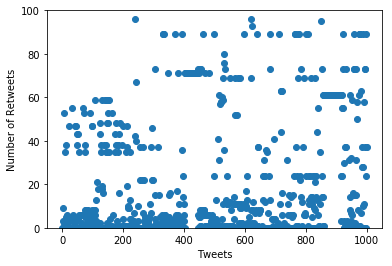

In [7]:
plt.scatter(x=np.arange(len(df)), y=df.retweet_count)
plt.ylim(0, 100)
plt.ylabel('Number of Retweets')
plt.xlabel('Tweets')
plt.show()

In [8]:


import re
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
# print df.loc[1].text
stop_words = stopwords.words('english')


def process_data(frame):
    
    frame = frame.copy()
    for i in range(len(frame)):
        data = frame.loc[i]
        text = data.text
#         print '*'*20
#         print 'ORIGINAL ', text
        # Remove username
        usernames = [ent['screen_name'] for ent in data.entities['user_mentions']] + [data['user']['screen_name']]
        usernames = map(lambda name: '@'+name, usernames)
        big_regex = re.compile('|'.join(map(re.escape, usernames)))
        text = big_regex.sub("", text)
                
        # Just remove Hash
        text = text.replace('#', '')
        
        # Remove urls
        urls = [ent['url'] for ent in data.entities['urls']]
        try:
            urls += [ent['url'] for ent in data.entities['media']]
        except:
            pass
        big_regex = re.compile('|'.join(map(re.escape, urls)))
        text = big_regex.sub("", text)
        
        # Remove Stop words
#         print '*'*20

#         big_regex = re.compile('|'.join(map(re.escape, stop_words)))
#         text = big_regex.sub("", text)
#         print 'NOW ', text
#         print '='*40
        print i,
        frame.set_value(i, 'text', text)
        
    # returning new copy
    return frame
    
# process_data(df)

In [9]:
# Term Level Similarity between tweets

import time
    
from code.similarities import TermLevelSimilarity

tic = time.time()
term_level_similarity = TermLevelSimilarity(df)
similarities = term_level_similarity.compute_similarity()
toc = time.time()

print
print 'Time taken to compute term level similarity', (toc - tic)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [38]:
class SemanticLevelSimilarity:
    '''
        Semantic level similarity computation class
    '''
    def __init__(self, df):
        self.df = df  

In [82]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(20)
tic = time.time()
clusters = sc.fit_predict(similarities)
toc = time.time()
print clusters
print len(set(clusters))
print 'Time took to run spectral cluster', (toc-tic)

[ 3  3  3 ...,  6 19 11]
20
Time took to run spectral cluster 844.698927164


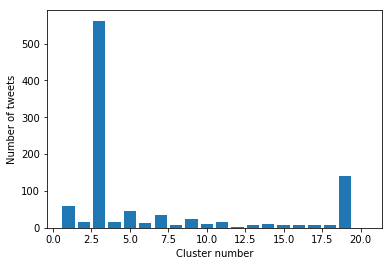

In [97]:
cluster_dimensions = [clusters[clusters == i].shape[0] for i in range(1, 21)]
plt.bar(np.arange(1, 21), cluster_dimensions)
plt.xlabel('Cluster number')
plt.ylabel('Number of tweets')
plt.show()
# cluster_dimensions
# print clusters[clusters == 1].shape
# print df.loc[np.where(clusters == 5)].text
# print clusters[clusters == 2].shape
# print clusters[clusters == 3].shape
# print clusters[clusters == 4].shape
# print clusters[clusters == 5].shape

In [142]:
df.loc[np.where(clusters == 15)].text

# def most_occuring

543    RT : CleanDelhi SwachhBharat MyCleanIndia Clea...
566    RT : CleanDelhi SwachhBharat MyCleanIndia Clea...
567    RT : CleanDelhi SwachhBharat MyCleanIndia Clea...
576    RT : CleanDelhi SwachhBharat MyCleanIndia Clea...
577    RT : CleanDelhi SwachhBharat MyCleanIndia Clea...
580    RT : CleanDelhi SwachhBharat MyCleanIndia Clea...
598    RT : CleanDelhi SwachhBharat MyCleanIndia Clea...
Name: text, dtype: object

Number of Clusters 620 for num_samples =  1


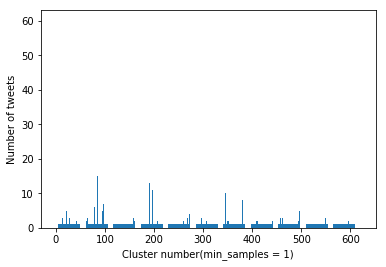

Number of Clusters 89 for num_samples =  2


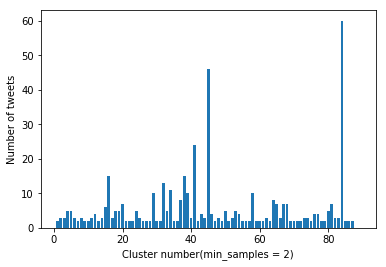

Number of Clusters 53 for num_samples =  3


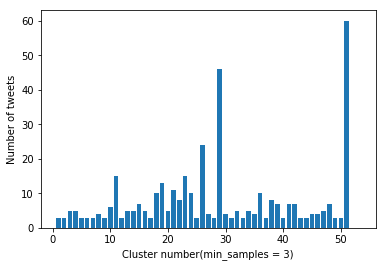

Number of Clusters 34 for num_samples =  4


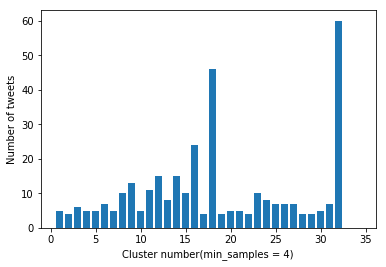

Number of Clusters 28 for num_samples =  5


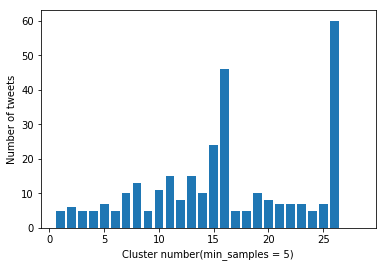

Number of Clusters 19 for num_samples =  6


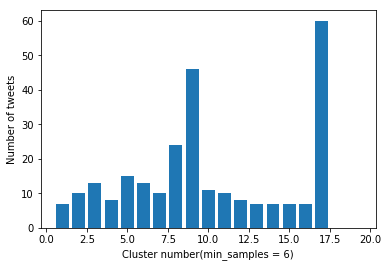

Number of Clusters 18 for num_samples =  7


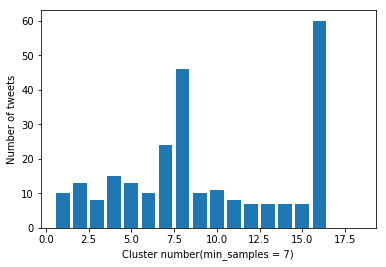

Number of Clusters 13 for num_samples =  8


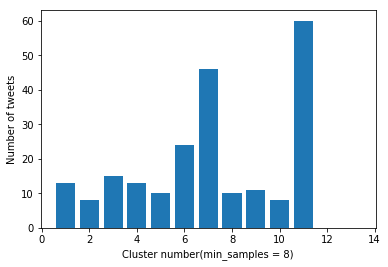

Number of Clusters 11 for num_samples =  9


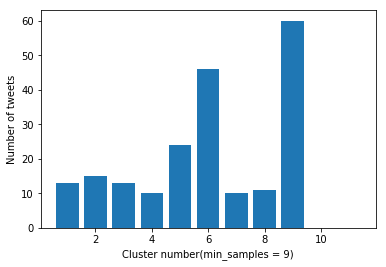

Number of Clusters 11 for num_samples =  10


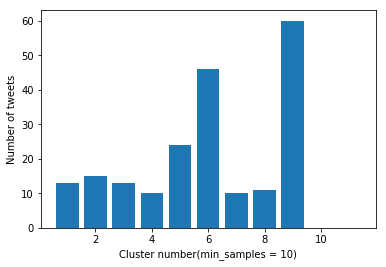

In [126]:
from sklearn.cluster import DBSCAN

for n in range(10):
    db = DBSCAN(min_samples=n+1)
    db_clusters = db.fit_predict(similarities)
    num_clus = len(set(db_clusters))
    print 'Number of Clusters', num_clus, 'for num_samples = ',n+1
    db_cluster_dimensions = [db_clusters[db_clusters == i].shape[0] for i in range(1, num_clus+1)]
    plt.bar(np.arange(1, num_clus+1), db_cluster_dimensions)
    plt.xlabel('Cluster number(min_samples = '+str(n+1)+')')
    plt.ylabel('Number of tweets')
    plt.show()

Number of Clusters 19


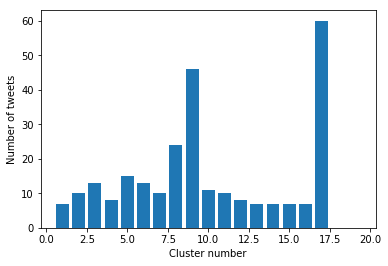

In [134]:
db = DBSCAN(min_samples=6)
db_clusters = db.fit_predict(similarities)
num_clus = len(set(db_clusters))
print 'Number of Clusters', num_clus
db_cluster_dimensions = [db_clusters[db_clusters == i].shape[0] for i in range(1, num_clus+1)]
plt.bar(np.arange(1, num_clus+1), db_cluster_dimensions)
plt.xlabel('Cluster number')
plt.ylabel('Number of tweets')
plt.show()

In [145]:
df.loc[np.where(db_clusters == 17)].text

855    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
860    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
861    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
862    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
863    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
864    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
865    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
866    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
867    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
868    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
869    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
870    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
871    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
872    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
873    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
874    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
875    RT : Cu Delhi on 9th October  Mr &amp; Miss No...
876    RT : Cu Delhi on 9th Oct

In [39]:
from nltk.corpus import wordnet as wn

In [49]:
for ss in wn.synsets('bottle'):
    print ss

Synset('bottle.n.01')
Synset('bottle.n.02')
Synset('bottle.n.03')
Synset('bottle.v.01')
Synset('bottle.v.02')


In [62]:
good = wn.synset('good.n.03')
bad = wn.synset('bad.n.01')
better = wn.synset('better.n.01')
print good.path_similarity(better)
print good.path_similarity(good)
print good.path_similarity(bad)

0.5
1.0
0.333333333333


0.166666666667
1.0
0.2


In [61]:
wn.synsets('good')

[Synset('good.n.01'),
 Synset('good.n.02'),
 Synset('good.n.03'),
 Synset('commodity.n.01'),
 Synset('good.a.01'),
 Synset('full.s.06'),
 Synset('good.a.03'),
 Synset('estimable.s.02'),
 Synset('beneficial.s.01'),
 Synset('good.s.06'),
 Synset('good.s.07'),
 Synset('adept.s.01'),
 Synset('good.s.09'),
 Synset('dear.s.02'),
 Synset('dependable.s.04'),
 Synset('good.s.12'),
 Synset('good.s.13'),
 Synset('effective.s.04'),
 Synset('good.s.15'),
 Synset('good.s.16'),
 Synset('good.s.17'),
 Synset('good.s.18'),
 Synset('good.s.19'),
 Synset('good.s.20'),
 Synset('good.s.21'),
 Synset('well.r.01'),
 Synset('thoroughly.r.02')]

In [68]:
similarities

array([[   4.        ,  110.05060811,  120.03387942, ...,  130.00444202,
         133.00403215,  130.00444202],
       [ 110.05060811,    8.        ,  107.02942079, ...,  115.02537023,
         112.02302928,  115.02537023],
       [ 120.03387942,  107.02942079,    5.        , ...,  128.00439648,
         128.00399081,  128.00439648],
       ..., 
       [ 130.00444202,  115.02537023,  128.00439648, ...,    4.        ,
         118.03970052,    4.        ],
       [ 133.00403215,  112.02302928,  128.00399081, ...,  118.03970052,
          11.        ,  118.03970052],
       [ 130.00444202,  115.02537023,  128.00439648, ...,    4.        ,
         118.03970052,    4.        ]])

In [70]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=4, random_state=0)

In [71]:
kmean.fit(similarities)
# kmean.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

array([[ 121.87679573,  108.56686599,  116.31132552,  116.04147818,
         108.0000649 ,  115.61841785,  112.87817188,  113.25915691,
         111.39549506,  122.31848614,  112.97405235,  123.84779842,
         115.21042305,  116.44753153,  113.79440606,  112.79653923,
         113.00062086,  123.67433887,  113.85859277,  112.57184465,
         117.17850147,  119.65668042,  113.79440606,  123.07945358,
         115.86292635,  125.45819044,  115.60790901,  115.76596171,
         110.98057221,  109.311847  ,  112.88030403,  113.9419998 ,
         109.311847  ,  110.68702891,  123.67433887,  109.311847  ,
         114.50526319,  124.33024155,  110.65143691,  114.60767096,
         116.04427796,  110.35771569,  123.07945358,  114.54980869,
         114.68845783,  118.59640434,  123.07945358,  123.26536998,
         112.7649    ,  123.84779842,  117.33637013,  112.7649    ,
         118.01848413,  123.26536998,  108.08825697,  112.02162325,
         114.86049457,  111.63394625,  110.45085

In [23]:
df

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,is_quote_status,lang,metadata,place,retweet_count,retweeted,source,text,truncated,user
0,None,None,Fri Aug 25 07:57:44 +0000 2017,"{u'symbols': [], u'user_mentions': [], u'hasht...",0,False,None,900990561787682816,900990561787682816,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ANCIENT INDIA TRAVELS\nE mail : ancient@airtel...,True,"{u'follow_request_sent': False, u'has_extended..."
1,None,None,Fri Aug 25 07:56:34 +0000 2017,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,900990267725144064,900990267725144064,None,...,False,pt,"{u'iso_language_code': u'pt', u'result_type': ...",None,9,False,"<a href=""http://twitter.com/download/android"" ...",RT @DreamsDelhi: Delhi #Delhi #Mughals #Oldpai...,False,"{u'follow_request_sent': False, u'has_extended..."
2,None,None,Fri Aug 25 07:55:23 +0000 2017,"{u'symbols': [], u'user_mentions': [], u'hasht...",5,False,None,900989972051673088,900989972051673088,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,3,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#Delhi HC sought #ElectionCommission's respons...,False,"{u'follow_request_sent': False, u'has_extended..."
3,None,None,Fri Aug 25 07:53:16 +0000 2017,"{u'symbols': [], u'user_mentions': [], u'hasht...",0,False,None,900989437626155008,900989437626155008,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,0,False,"<a href=""http://www.airairair.org"" rel=""nofoll...",Air quality in #Delhi 💨 😷 is worse than #Lo...,True,"{u'follow_request_sent': False, u'has_extended..."
4,None,None,Fri Aug 25 07:51:18 +0000 2017,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,900988944195633152,900988944195633152,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,2,False,"<a href=""http://twitter.com/download/android"" ...",RT @Ravinepz: Hot weather ? no problem 😊 \n#D...,False,"{u'follow_request_sent': False, u'has_extended..."
5,None,None,Fri Aug 25 07:51:18 +0000 2017,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,900988942954119169,900988942954119169,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,53,False,"<a href=""http://twitter.com/download/android"" ...",RT @BloodDonorsIn: #Delhi\nNeed any group bloo...,False,"{u'follow_request_sent': False, u'has_extended..."
6,None,None,Fri Aug 25 07:51:10 +0000 2017,"{u'symbols': [], u'user_mentions': [], u'hasht...",0,False,None,900988908980383744,900988908980383744,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,0,False,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...","At the Doorstep of Almighty, by Prasanta Singh...",False,"{u'follow_request_sent': False, u'has_extended..."
7,None,None,Fri Aug 25 07:50:49 +0000 2017,"{u'symbols': [], u'user_mentions': [], u'hasht...",0,False,None,900988820744806400,900988820744806400,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,0,False,"<a href=""http://flightsglobal.net"" rel=""nofoll...",#Delhi ##Hotels - An #Insignia of #Luxury\n\nh...,False,"{u'follow_request_sent': False, u'has_extended..."
8,None,None,Fri Aug 25 07:50:04 +0000 2017,"{u'symbols': [], u'user_mentions': [], u'hasht...",0,False,None,900988634874171393,900988634874171393,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,0,False,"<a href=""http://www.hootsuite.com"" rel=""nofoll...","What is verbal, emotional or psychological #ab...",False,"{u'follow_request_sent': False, u'has_extended..."
9,None,None,Fri Aug 25 07:49:39 +0000 2017,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,900988530750406656,900988530750406656,None,...,False,en,"{u'iso_language_code': u'en', u'result_type': ...",None,35,False,"<a href=""http://twitter.com/download/andr

In [29]:
df.text

0     ANCIENT INDIA TRAVELS\nE mail : ancient@airtel...
1     RT @DreamsDelhi: Delhi #Delhi #Mughals #Oldpai...
2     #Delhi HC sought #ElectionCommission's respons...
3     Air quality in #Delhi 💨 😷  is worse than #Lo...
4     RT @Ravinepz: Hot weather ? no problem 😊 \n#D...
5     RT @BloodDonorsIn: #Delhi\nNeed any group bloo...
6     At the Doorstep of Almighty, by Prasanta Singh...
7     #Delhi ##Hotels - An #Insignia of #Luxury\n\nh...
8     What is verbal, emotional or psychological #ab...
9     RT @BloodAid: #Delhi #Urgent Need B+ #blood @ ...
10    "After Delhi Government's Show-Cause Notice, S...
11    RT @BloodAid: #Delhi Need 15 units Any group #...
12    @ArvindKejriwal #Delhi HC https://t.co/3WrDlmL3L5
13    RT @DelhiTimesTweet: After a fatal superbike c...
14    RT @anindya0909: Blogpost Agrasen ki Baoli in ...
15    At the Doorstep of Almighty, by Prasanta Singh...
16    At the Doorstep of Almighty, by Prasanta Singh...
17    RT @jetairways: #9Wupdate Air traffic congest

In [31]:
import HTMLParser

class PreProcess:
    '''
        Twitter data pre processing class
    '''
    def __init__(self, df):
        self.df = df.copy()

    def process_data(self):
        self.df.text.apply(self.applyfilter)
        return self.df

def escapeHtml(text):
    html_parser = HTMLParser.HTMLParser()
    return html_parser.unescape(text)

def utfencoding(text):
    return text.encode('ascii','ignore')

def lowercase(text):
    return text.lower()

def applyfilter(t):
    return lowercase(utfencoding(escapeHtml(t)))

df2 = df.copy()
df2.text.apply(applyfilter)

0     ancient india travels\ne mail : ancient@airtel...
1     rt @dreamsdelhi: delhi #delhi #mughals #oldpai...
2     #delhi hc sought #electioncommission's respons...
3     air quality in #delhi  is worse than #london. ...
4     rt @ravinepz: hot weather ? no problem  \n#del...
5     rt @blooddonorsin: #delhi\nneed any group bloo...
6     at the doorstep of almighty, by prasanta singh...
7     #delhi ##hotels - an #insignia of #luxury\n\nh...
8     what is verbal, emotional or psychological #ab...
9     rt @bloodaid: #delhi #urgent need b+ #blood @ ...
10    "after delhi government's show-cause notice, s...
11    rt @bloodaid: #delhi need 15 units any group #...
12    @arvindkejriwal #delhi hc https://t.co/3wrdlml3l5
13    rt @delhitimestweet: after a fatal superbike c...
14    rt @anindya0909: blogpost agrasen ki baoli in ...
15    at the doorstep of almighty, by prasanta singh...
16    at the doorstep of almighty, by prasanta singh...
17    rt @jetairways: #9wupdate air traffic cong

In [32]:
df.text

0     ANCIENT INDIA TRAVELS\nE mail : ancient@airtel...
1     RT @DreamsDelhi: Delhi #Delhi #Mughals #Oldpai...
2     #Delhi HC sought #ElectionCommission's respons...
3     Air quality in #Delhi 💨 😷  is worse than #Lo...
4     RT @Ravinepz: Hot weather ? no problem 😊 \n#D...
5     RT @BloodDonorsIn: #Delhi\nNeed any group bloo...
6     At the Doorstep of Almighty, by Prasanta Singh...
7     #Delhi ##Hotels - An #Insignia of #Luxury\n\nh...
8     What is verbal, emotional or psychological #ab...
9     RT @BloodAid: #Delhi #Urgent Need B+ #blood @ ...
10    "After Delhi Government's Show-Cause Notice, S...
11    RT @BloodAid: #Delhi Need 15 units Any group #...
12    @ArvindKejriwal #Delhi HC https://t.co/3WrDlmL3L5
13    RT @DelhiTimesTweet: After a fatal superbike c...
14    RT @anindya0909: Blogpost Agrasen ki Baoli in ...
15    At the Doorstep of Almighty, by Prasanta Singh...
16    At the Doorstep of Almighty, by Prasanta Singh...
17    RT @jetairways: #9Wupdate Air traffic congest

In [9]:
jaccard_distance(set("vipin is here".split()), set("priya is here".split()))

0.5

In [107]:
stop_words

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all